In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv


In [2]:
# Study data files
suicide_path = "../../data/Suicide.csv"
depression_path = "../../data/Adults_depression_S.csv"

In [3]:
# Read the data
suicide = pd.read_csv(suicide_path)

# Display the data table for preview
suicide.head()

,YEAR,STATE,RATE,DEATHS
0,2020,AL,16.0,793
1,2020,AK,27.5,204
2,2020,AZ,17.6,1363
3,2020,AR,19.0,583
4,2020,CA,10.0,4144


In [4]:
# Read the data
depression = pd.read_csv(depression_path)

# Display the data table for preview
depression.head()

,Year,StateAbbr,State,Depression rate
0,2018,AL,Alabama,24.0
1,2018,AK,Alaska,20.2
2,2018,AZ,Arizona,16.7
3,2018,AR,Arkansas,22.5
4,2018,CA,California,15.4


In [5]:
# Filter the DataFrame down only to those columns to chart
suicide_clean = suicide.loc[suicide['YEAR']==2020]
suicide_clean = suicide_clean[["STATE","RATE"]].set_index("STATE")
suicide_clean = suicide_clean.rename(columns={'RATE':'Suicide rate'})
suicide_clean.head()

,Suicide rate
STATE,
AL,16.0
AK,27.5
AZ,17.6
AR,19.0
CA,10.0


In [6]:
top_5_states_suicide_2020 = suicide_clean.nlargest(5, 'Suicide rate')
top_5_states_suicide_2020

,Suicide rate
STATE,
WY,30.5
AK,27.5
MT,26.1
NM,24.2
ID,23.2


In [7]:
bottom_5_states_suicide_2020 = suicide_clean.nsmallest(5, 'Suicide rate')
bottom_5_states_suicide_2020

,Suicide rate
STATE,
NJ,7.1
NY,8.0
MA,8.4
RI,8.5
MD,9.2


In [8]:
# Filter the DataFrame down only to those columns to chart
depression_clean = depression.loc[depression['Year']==2020]
depression_clean = depression_clean.rename(columns={'StateAbbr':'STATE'})
depression_clean = depression_clean[["STATE","Depression rate"]].set_index("STATE")
depression_clean.head()

,Depression rate
STATE,
AL,23.5
AK,15.9
AZ,17.4
AR,23.5
CA,14.1


In [9]:
top_5_states_depression_2020 = depression_clean.nlargest(5, 'Depression rate')
top_5_states_depression_2020

,Depression rate
STATE,
WV,26.4
KY,24.2
TN,24.1
AL,23.5
AR,23.5


In [10]:
bottom_5_states_depression_2020 = depression_clean.nsmallest(5, 'Depression rate')
bottom_5_states_depression_2020

,Depression rate
STATE,
HI,12.7
CA,14.1
FL,14.7
IL,14.7
NJ,15.2


In [11]:
suicide_depression_df = pd.merge(suicide_clean, depression_clean, on=["STATE"], how="outer")
suicide_depression_df.reset_index("STATE")
suicide_depression_df

,Suicide rate,Depression rate
STATE,,
AL,16.0,23.5
AK,27.5,15.9
AZ,17.6,17.4
AR,19.0,23.5
CA,10.0,14.1
CO,21.5,18.4
CT,9.3,17.7
DE,12.3,15.6
FL,13.2,14.7


In [12]:
suicide_depression_df.dropna
suicide_depression_df

,Suicide rate,Depression rate
STATE,,
AL,16.0,23.5
AK,27.5,15.9
AZ,17.6,17.4
AR,19.0,23.5
CA,10.0,14.1
CO,21.5,18.4
CT,9.3,17.7
DE,12.3,15.6
FL,13.2,14.7


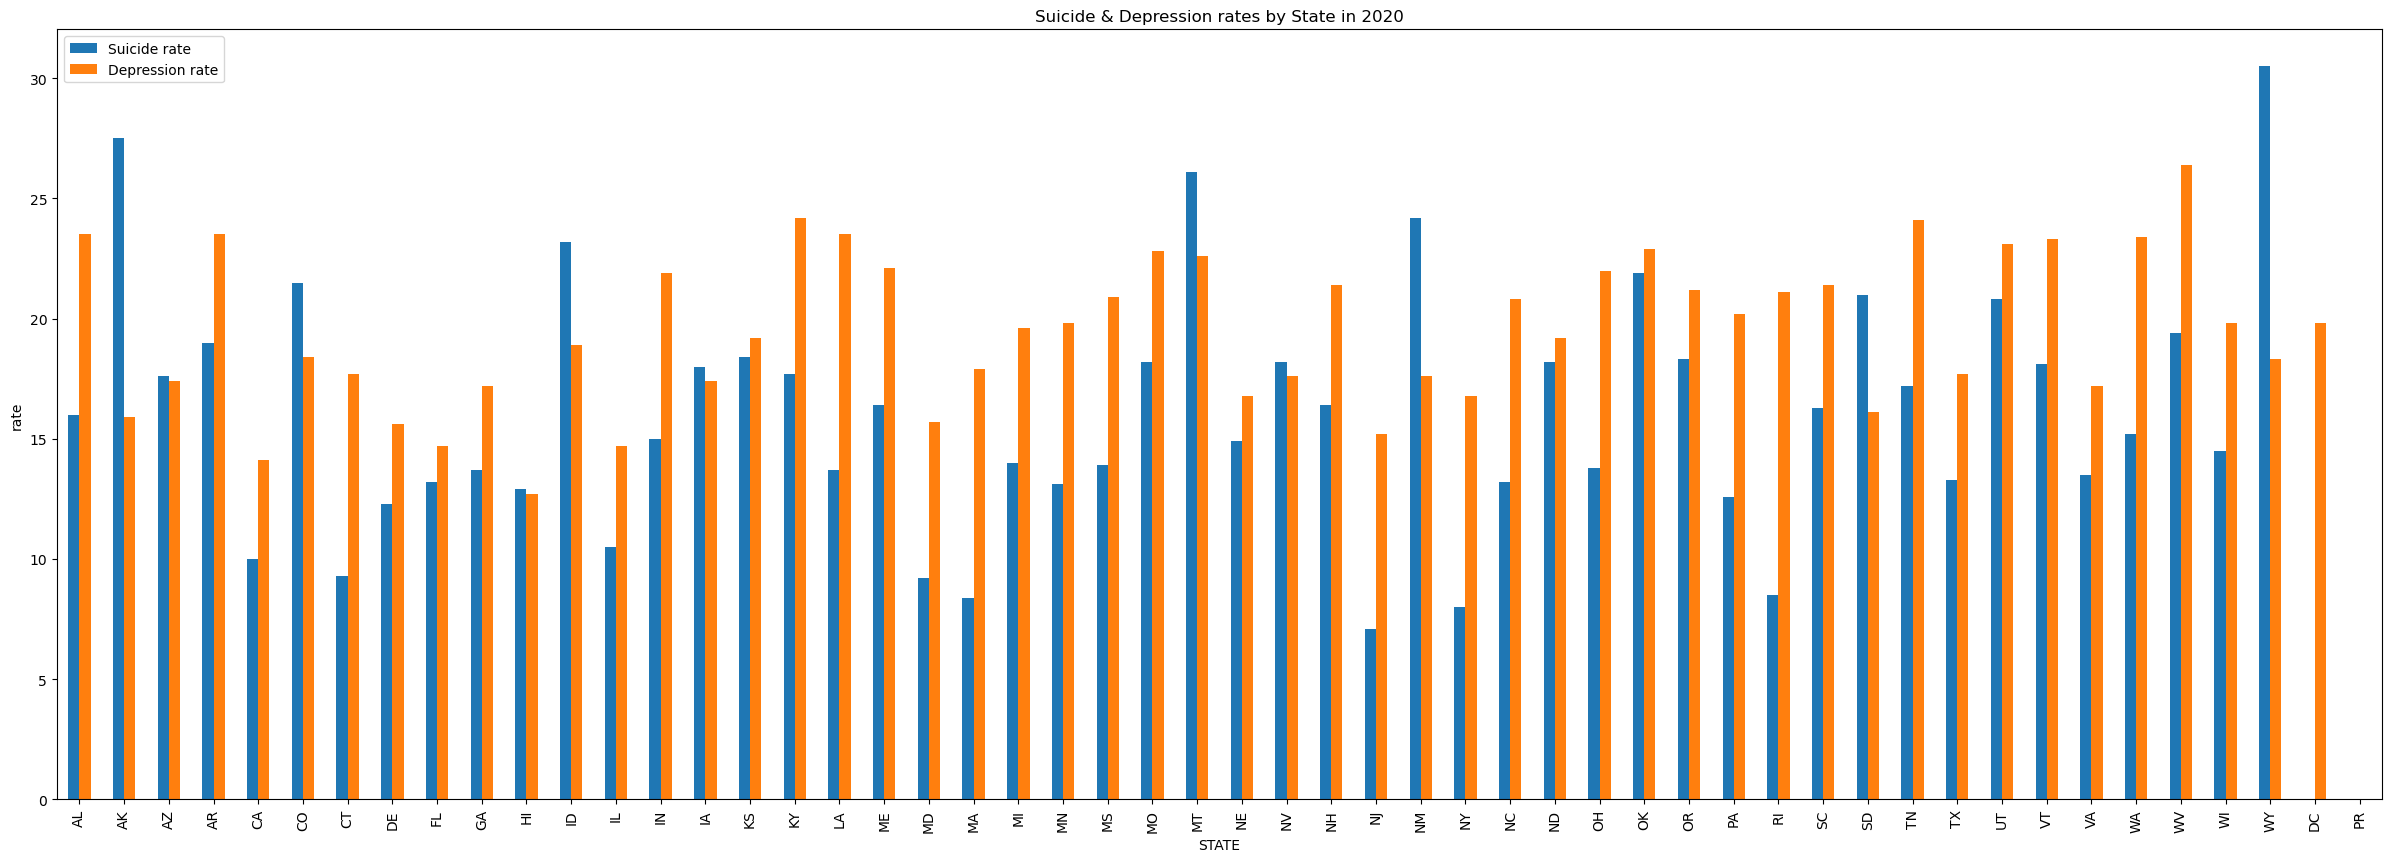

In [13]:
# Create line graphs for suicide and depression rate
suicide_depression_df.plot(kind="bar", figsize=(30,10))
plt.xticks
plt.ylabel('rate')
plt.title('Suicide & Depression rates by State in 2020')
plt.legend()
plt.savefig("../../images/Suicide and depression rate in 2020.png")
plt.show()